# Milestone 1

#### Dashboard Dapat di akses melalui [Heroku](https://sonny-riadi-ftds-009-p0m1.herokuapp.com/)

### i. Perkenalan
Nama : Sonny Riadi\
Batch : FTDS-009

Deskripsi:\
Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.

Objektif:
1. melalukan visualiasasi terhadap hasil exploration data
2. melalukan uji hipotesis untuk mengetahui apakah terdapat perbadaan rata-rata *gross income* untuk kota Mandalay, Naypyitaw dan Yangon

### ii. Import Library

In [52]:
#import library yang akan digunakan dalam project ini
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


### iii. Data Loading

Dataset yang digunakan yaitu `Supermarket Sales` yang dapat di akses melalui [kaggle](https://www.kaggle.com/aungpyaeap/supermarket-sales)

In [53]:
#Loading Data
data = pd.read_csv('data_cleaning/supermarket_sales - Sheet1.csv')

#### Basic Data Exploration

In [54]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Dataset information :

| Column | Description |
|------|-------------|
|Invoice id| Computer generated sales slip invoice identification number|
|Branch| Branch of supercenter (3 branches are available identified by A, B and C).|
|City |Location of supercenters|
|Customer type| Type of customers, recorded by Members for customers using member card and Normal for without member card.|
|Gender| Gender type of customer|
|Product line| General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel|
|Unit price| Price of each product in $|
|Quantity| Number of products purchased by customer|
|Tax| 5% tax fee for customer buying|
|Total| Total price including tax|
|Date| Date of purchase (Record available from January 2019 to March 2019)|
|Time| Purchase time (10am to 9pm)|
|Payment| Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)|
|COGS| Cost of goods sold|
|Gross margin percentage| Gross margin percentage|
|Gross income| Gross income|
|Rating| Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)|



In [55]:
data.shape

(1000, 17)

dapat diketahui di dataset ini terdapat 1000 baris dan 17 kolom

### iv. Data Cleaning

In [56]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

##### 1. Missing Values

In [58]:
# find missing values for each column
data.columns[data.isnull().any()]

Index([], dtype='object')

Tidak terdapat missing values

##### 2. Duplicated Values

In [59]:
data['Invoice ID'].duplicated().value_counts()

False    1000
Name: Invoice ID, dtype: int64

tidak terdapat Duplicated Values

##### 3. Format Date Column

In [60]:
data['Date'] = pd.to_datetime(data['Date'])

Kolom `Date` type object diganti menjadi datetime

##### 4. Format Time Column

In [61]:
data['Time'] = pd.to_datetime(data['Time']).dt.hour

Kolom `Time` type object diganti menjadi datetime

##### 5. Delete Uneeded Column

In [62]:
data.drop(['Branch','Tax 5%','gross margin percentage'],axis=1,inplace=True)

In [63]:
data.head(5)

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10,Ewallet,604.17,30.2085,5.3


##### 6. Export Dataframe to Csv
export data yang akan digunakan untuk visualisasi 

In [64]:
data.to_csv('data_cleaning/supermarket_sales_clean.csv',index=False)

### V. Data Exploration

In [65]:
data.head(10)

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10,Ewallet,604.17,30.2085,5.3
5,699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,627.6165,2019-03-25,18,Ewallet,597.73,29.8865,4.1
6,355-53-5943,Yangon,Member,Female,Electronic accessories,68.84,6,433.6920,2019-02-25,14,Ewallet,413.04,20.6520,5.8
7,315-22-5665,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,772.3800,2019-02-24,11,Ewallet,735.60,36.7800,8.0
8,665-32-9167,Yangon,Member,Female,Health and beauty,36.26,2,76.1460,2019-01-10,17,Credit card,72.52,3.6260,7.2
9,692-92-5582,Mandalay,Member,Female,Food and beverages,54.84,3,172.7460,2019-02-20,13,Credit card,164.52,8.2260,5.9


##### 1. daily Average Gross Income

In [66]:
data_1 = data.groupby(['Date','City'])['gross income'].aggregate('mean').unstack()
data_1 = data_1.fillna(0)
data_1['all city'] = data_1.mean(axis='columns')
data_1.head(10)

City,Mandalay,Naypyitaw,Yangon,all city
Date,,,,
2019-01-01,24.392000,9.966250,22.584000,18.980750
2019-01-02,13.842875,11.325000,7.310750,10.826208
2019-01-03,16.138000,2.953000,14.879500,11.323500
2019-01-04,8.104500,29.992500,11.506250,16.534417
2019-01-05,7.726333,12.207375,19.281000,13.071569
2019-01-06,24.324750,30.538000,12.475900,22.446217
2019-01-07,21.300167,6.133000,17.554833,14.996000
2019-01-08,17.531333,14.293625,8.136375,13.320444
2019-01-09,4.012500,25.242700,9.635000,12.963400


In [67]:
fig =   px.area(data_1,y='all city') #select City
fig.show()


In [68]:
data_1.mean()

City
Mandalay     13.821739
Naypyitaw    16.151963
Yangon       14.475609
all city     14.816437
dtype: float64

Average daily gross income terbesar yaitu kota Naypyitaw dengan nilai $16.1519

##### 2. Comparison Average Gross income

In [69]:
data_1 = data.groupby(['Date','City'])['gross income'].aggregate('mean').unstack()
data_1 = data_1.fillna(0)
data_1['all city'] = data_1.mean(axis='columns')
data_1.head(10)

City,Mandalay,Naypyitaw,Yangon,all city
Date,,,,
2019-01-01,24.392000,9.966250,22.584000,18.980750
2019-01-02,13.842875,11.325000,7.310750,10.826208
2019-01-03,16.138000,2.953000,14.879500,11.323500
2019-01-04,8.104500,29.992500,11.506250,16.534417
2019-01-05,7.726333,12.207375,19.281000,13.071569
2019-01-06,24.324750,30.538000,12.475900,22.446217
2019-01-07,21.300167,6.133000,17.554833,14.996000
2019-01-08,17.531333,14.293625,8.136375,13.320444
2019-01-09,4.012500,25.242700,9.635000,12.963400


In [70]:
fig =   px.line(data_1,y=data_1.columns[1:4]) #select City
fig.show()


##### 3. Customer Profiling by Gender

In [71]:
data_2 = data.groupby(['Gender'])[['City']].value_counts().unstack()
data_2['all city'] = data_2.sum(axis='columns')
data_2

City,Mandalay,Naypyitaw,Yangon,all city
Gender,,,,
Female,162,178,161,501
Male,170,150,179,499


In [72]:
px.pie(data_2,values='all city',names=data_2.index) #select city

Pengunjung supermarket di all city terdiri dari pengunjung Female sebanyak 501 dan pengunjung Male sebanyak 499

##### 4. Customer Profiling by Customer Type

In [73]:
data_3 = data.groupby(['Customer type'])[['City']].value_counts().unstack()
data_3['all city'] = data_3.sum(axis='columns')
data_3

City,Mandalay,Naypyitaw,Yangon,all city
Customer type,,,,
Member,165,169,167,501
Normal,167,159,173,499


In [74]:
px.pie(data_3,values='all city',names=data_3.index) #select city

Type member supermarket di all city terdiri dari Member sebanyak 501 dan Normal sebanyak 499

##### 5. Customer profiling by Payment Type

In [75]:
data_4 = data.groupby(['Payment'])[['City']].value_counts().unstack()
data_4['all city'] = data_4.sum(axis='columns')
data_4

City,Mandalay,Naypyitaw,Yangon,all city
Payment,,,,
Cash,110,124,110,344
Credit card,109,98,104,311
Ewallet,113,106,126,345


In [76]:
px.pie(data_4,values='all city',names=data_4.index) #select city

Jenis pembayaran di supermarket all city terdiri dari Cash sebanyak 344,Credit card sebanyak 311 dan Ewallet sebanyak 345

##### 6. Product Type

In [77]:
data_5 = data.groupby(['Product line','City'])['Quantity'].aggregate('sum').unstack()
data_5['all city'] = data_5.sum(axis='columns')
data_5

City,Mandalay,Naypyitaw,Yangon,all city
Product line,,,,
Electronic accessories,316,333,322,971
Fashion accessories,297,342,263,902
Food and beverages,270,369,313,952
Health and beauty,320,277,257,854
Home and lifestyle,295,245,371,911
Sports and travel,322,265,333,920


In [78]:
px.bar(data_5,x=data_5.index,y='all city') #select city

Product Line Purchased paling banya di all city yaitu adalah Electronic accessories yaitu sebanyak 971 Unit sementara itu untuk Purchased paling sedikit adalah Health and beauty yaitu sebanyak 854 Unit.

##### 7. Peak Hour

In [79]:
data_6 = data.groupby(['Time','City'])['Invoice ID'].count().unstack()
data_6['all city'] = data_6.sum(axis='columns')
data_6

City,Mandalay,Naypyitaw,Yangon,all city
Time,,,,
10,26,37,38,101
11,33,22,35,90
12,25,31,33,89
13,38,34,31,103
14,30,28,25,83
15,32,33,37,102
16,17,28,32,77
17,20,27,27,74
18,35,25,33,93


In [80]:
px.bar(data_6,x=data_6.index,y='all city') #select city

Jumlah transaksi terbanyak di all city yaitu pada pukul 19:00 yaitu sebanyak 113 transaksi sementara untuk transaksi paling sedikit yaitu pada pukul 17:00 yaitu sebanyak 74 transaksi

##### 8. Average Rating

In [81]:
data_7 = data.groupby(['Date','City'])['Rating'].mean().unstack()
data_7['all city'] = data_7.mean(axis='columns')
data_7

City,Mandalay,Naypyitaw,Yangon,all city
Date,,,,
2019-01-01,7.333333,6.375,6.300,6.669444
2019-01-02,6.200000,6.150,5.650,6.000000
2019-01-03,8.533333,8.400,7.500,8.144444
2019-01-04,4.866667,9.700,7.400,7.322222
2019-01-05,7.933333,8.575,6.220,7.576111
...,...,...,...,...
2019-03-26,8.433333,5.675,6.350,6.819444
2019-03-27,6.900000,6.600,6.680,6.726667
2019-03-28,5.100000,7.800,7.000,6.633333


In [82]:
data_7['all city'].mean()

6.937719368646336

rata-rata Rating untuk keseluruhan City adalah 6.9377

### VI. Statistical Implementaion (Hypothesis Testing)

Pada bagian ini akan dilakukan uji hipotesis untuk mencari tahu apakah terdapat atau tidak terdapat perbedaan average daily gross income diantara supermarket di kota Mandalay, Naypyitaw dan Yangon. untuk itu dilakukanlah uji hipotesis, pengujian yang dilakukan adalah dengan menggunakan Anova Test.

##### 1. Data Preparation

In [83]:
data_8 = data.groupby(['Date','City'])['gross income'].aggregate('mean').unstack()
data_8 = data_8.fillna(0)
data_8

City,Mandalay,Naypyitaw,Yangon
Date,,,
2019-01-01,24.392000,9.966250,22.584000
2019-01-02,13.842875,11.325000,7.310750
2019-01-03,16.138000,2.953000,14.879500
2019-01-04,8.104500,29.992500,11.506250
2019-01-05,7.726333,12.207375,19.281000
...,...,...,...
2019-03-26,4.781000,5.642500,9.423333
2019-03-27,10.701125,44.919000,10.101200
2019-03-28,4.555500,7.631833,13.118500


##### 2. Measure of Central Tendency

In [84]:
print('Mandalay:')
print('Mean : ' +str(round(data_8.Mandalay.mean(),2)))
print('Median : ' +str(data_8.Mandalay.median()))
print('Modus : ' +str(data_8.Mandalay.mode()[0]))
print('')
print('Naypyitaw:')
print('Mean : ' +str(round(data_8.Naypyitaw.mean(),2)))
print('Median : ' +str(data_8.Naypyitaw.median()))
print('Modus : ' +str(data_8.Naypyitaw.mode()[0]))
print('')
print('Yangon:')
print('Mean : ' +str(round(data_8.Yangon.mean(),2)))
print('Median : ' +str(data_8.Yangon.median()))
print('Modus : ' +str(data_8.Yangon.mode()[0]))

Mandalay:
Mean : 13.82
Median : 13.353833333333332
Modus : 0.0

Naypyitaw:
Mean : 16.15
Median : 16.277285714285714
Modus : 0.0

Yangon:
Mean : 14.48
Median : 14.196
Modus : 3.7167499999999998


##### 3. Data Distribution

##### Mandalay

In [85]:
fig_data_mandalay = px.histogram(data_8.Mandalay)
fig_data_mandalay.add_vline(x=data_8.Mandalay.mean(), line_width=2, line_dash="dash", line_color="#A56CC1")
fig_data_mandalay.add_vline(x=data_8.Mandalay.median(), line_width=2, line_dash="dash", line_color="#A6ACEC")
fig_data_mandalay.show()

##### Naypyitaw

In [86]:
fig_data_naypyitaw= px.histogram(data_8.Naypyitaw)
fig_data_naypyitaw.add_vline(x=data_8.Naypyitaw.mean(), line_width=2, line_dash="dash", line_color="#A56CC1")
fig_data_naypyitaw.add_vline(x=data_8.Naypyitaw.median(), line_width=2, line_dash="dash", line_color="#A6ACEC")
fig_data_naypyitaw.show()

##### Yangon

In [87]:
fig_data_yangon= px.histogram(data_8.Yangon)
fig_data_yangon.add_vline(x=data_8.Yangon.mean(), line_width=2, line_dash="dash", line_color="#A56CC1")
fig_data_yangon.add_vline(x=data_8.Yangon.median(), line_width=2, line_dash="dash", line_color="#A6ACEC")
fig_data_yangon.show()

dapat dilihat dari grafik diatas data dapat dikatakan berdistribusi normal karena nilai `mean` mendekati nilai `median`.

##### 4. Measure Of Variance

##### Range

In [88]:
print('Range of Mandalay : ' + str(round(data_8.Mandalay.max()-data_8.Mandalay.min(),2)))
print('Range of Naypyitaw : ' + str(round(data_8.Naypyitaw.max()-data_8.Naypyitaw.min(),2)))
print('Range of Yangon : ' + str(round(data_8.Yangon.max()-data_8.Yangon.min(),2)))

Range of Mandalay : 29.33
Range of Naypyitaw : 44.92
Range of Yangon : 23.26


##### Variance

In [89]:
print('Variance of Mandalay : ' + str(round(data_8.Mandalay.var(),2)))
print('Variance of Naypyitaw : ' + str(round(data_8.Naypyitaw.var(),2)))
print('Variance of Yangon : ' + str(round(data_8.Yangon.var(),2)))

Variance of Mandalay : 46.62
Variance of Naypyitaw : 60.91
Variance of Yangon : 30.12


##### Standar Deviation

In [90]:
print('Standar Deviation of Mandalay : ' + str(round(data_8.Mandalay.std(),2)))
print('Standar Deviation of Naypyitaw : ' + str(round(data_8.Naypyitaw.std(),2)))
print('Standar Deviation of Yangon : ' + str(round(data_8.Yangon.std(),2)))

Standar Deviation of Mandalay : 6.83
Standar Deviation of Naypyitaw : 7.8
Standar Deviation of Yangon : 5.49


##### 5. Hypothesis Testing  Anova

**Hypothesis :**

H0: μ Mandalay = μ Naypyitaw = μ Yangon

H0: μ Mandalay != μ Naypyitaw != μ Yangon


**Confidence Interval :**

In [91]:
ci = stats.norm.interval(0.95, data_8.Mandalay.mean(), data_8.Mandalay.std())
ci

(0.4397426090680572, 27.203734624746815)

**Statistic Test**

In [92]:
f_stat,p_val = stats.f_oneway(data_8.Mandalay,data_8.Naypyitaw,data_8.Yangon)
print(f'f stat : {f_stat} \np value : {p_val}')

f stat : 2.802106032812893 
p value : 0.06248812820909787


In [93]:
f_stat

2.802106032812893

Hasil uji hipotesis dengan menggunakan anova test dapat disimpulkan bahwa kita `menerima H0 atau Hipotesis awal` hal tersebut dapat dilihat dari nilai p value diatas 0.05 sehingga dapat disimpulkan tidak ada perbedaan yang signifikan diantara rata-rata gross income kota Mandalay, Naypyitaw dan Yangon.

**Plot**

/home/sonnyrd/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/sonnyrd/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/sonnyrd/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



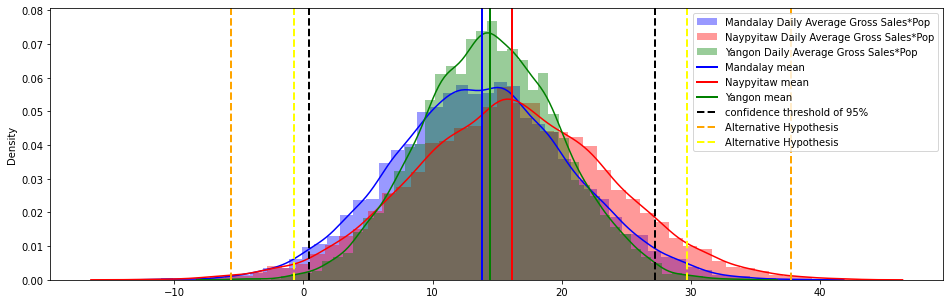

In [94]:
# Confidence interval 
ci = stats.norm.interval(0.95, data_8.Mandalay.mean(), data_8.Mandalay.std())

# create sample population
mandalay_pop = np.random.normal(data_8.Mandalay.mean(),data_8.Mandalay.std(),10000)
naypyitaw_pop = np.random.normal(data_8.Naypyitaw.mean(),data_8.Naypyitaw.std(),10000)
yangon_pop = np.random.normal(data_8.Yangon.mean(),data_8.Yangon.std(),10000)

ci = stats.norm.interval(0.95, data_8.Mandalay.mean(),data_8.Mandalay.std())
plt.figure(figsize=(16,5))

sns.distplot(mandalay_pop, label='Mandalay Daily Average Gross Sales*Pop',color='blue')
sns.distplot(naypyitaw_pop, label='Naypyitaw Daily Average Gross Sales*Pop',color='red')
sns.distplot(yangon_pop, label='Yangon Daily Average Gross Sales*Pop',color='green')

plt.axvline(data_8.Mandalay.mean(), color='blue', linewidth=2, label='Mandalay mean')
plt.axvline(data_8.Naypyitaw.mean(), color='red',  linewidth=2, label='Naypyitaw mean')
plt.axvline(data_8.Yangon.mean(), color='green',  linewidth=2, label='Yangon mean')

plt.axvline(ci[1], color='black', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='black', linestyle='dashed', linewidth=2)

plt.axvline(naypyitaw_pop.mean()+f_stat*naypyitaw_pop.std(), color='orange', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(naypyitaw_pop.mean()-f_stat*naypyitaw_pop.std(), color='orange', linestyle='dashed', linewidth=2)

plt.axvline(yangon_pop.mean()+f_stat*yangon_pop.std(), color='yellow', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(yangon_pop.mean()-f_stat*yangon_pop.std(), color='yellow', linestyle='dashed', linewidth=2)
plt.legend()

### VII. Kesimpulan

##### Exploration Data
1. Average daily gross income terbesar yaitu kota Naypyitaw dengan nilai $16.1519
2. Pengunjung supermarket di all city terdiri dari pengunjung Female sebanyak 501 dan pengunjung Male sebanyak 499
3. Type member supermarket di all city terdiri dari Member sebanyak 501 dan Normal sebanyak 499
4. Jenis pembayaran di supermarket all city terdiri dari Cash sebanyak 344,Credit card sebanyak 311 dan Ewallet sebanyak 345
5. Product Line Purchased paling banya di all city yaitu adalah Electronic accessories yaitu sebanyak 971 Unit sementara itu untuk Purchased paling sedikit adalah Health and beauty yaitu sebanyak 854 Unit.
6. Jumlah transaksi terbanyak di all city yaitu pada pukul 19:00 yaitu sebanyak 113 transaksi sementara untuk transaksi paling sedikit yaitu pada pukul 17:00 yaitu sebanyak 74 transaksi
7. rata-rata Rating untuk keseluruhan City adalah 6.9377

##### Uji Hipotesis
Berdasarkan hasil pengujian Hipotesis dengan menggunakan Anova, hasil uji statstik menunjukan nilai p-value sebesar 0.06,maka dapat disimpulkan H0 di terima yang berarti tidak terdapat perbedaan dari average daily gross income antara kota Mandalay, Naypyitay dan Yangon.